In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [48]:
df=pd.read_csv('Telco-Customer-Churn.csv')

In [49]:
df.shape

(7043, 21)

In [50]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [51]:
df['gender'] = df['gender'].astype('category')
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})

In [52]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

In [53]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [54]:
# Drop rows with missing values
df.dropna(inplace=True)

In [55]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [56]:
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix



# Define the dependent variable 'Churn' and independent variables
X = df[['tenure', 'MonthlyCharges','TotalCharges']]
y = df['Churn']

# Perform one-hot encoding for categorical variables
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
X_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

In [57]:
X_encoded.head()

,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [58]:
# Concatenate one-hot encoded and numeric features
X_final = pd.concat([X, X_encoded], axis=1)

In [59]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=90)


In [60]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
# Fit a logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [62]:
# Predictions
y_pred = logistic_model.predict(X_test)

In [63]:
# Confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[934 115]
 [149 209]]


In [64]:
# Coefficients and their significance using statsmodels
X_train_sm = sm.add_constant(X_train)
logit_model = sm.Logit(y_train.astype(float), X_train_sm)
result = logit_model.fit()


Optimization terminated successfully.
         Current function value: 0.419149
         Iterations 9


In [65]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5625
Model:                          Logit   Df Residuals:                     5601
Method:                           MLE   Df Model:                           23
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                  0.2797
Time:                        10:56:55   Log-Likelihood:                -2357.7
converged:                       True   LL-Null:                       -3273.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7048      0.061    -28.171      0.000      -1.823      -1.586
x1            -1.5471      0.169     -9.137      0.000      -1.879      -1.215
x2            -0.8934      1.061     -0.842      0.4

In [66]:
X_final.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'SeniorCitizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8123667377398721
Precision: 0.6450617283950617
Recall: 0.5837988826815642
F1 Score: 0.6129032258064517


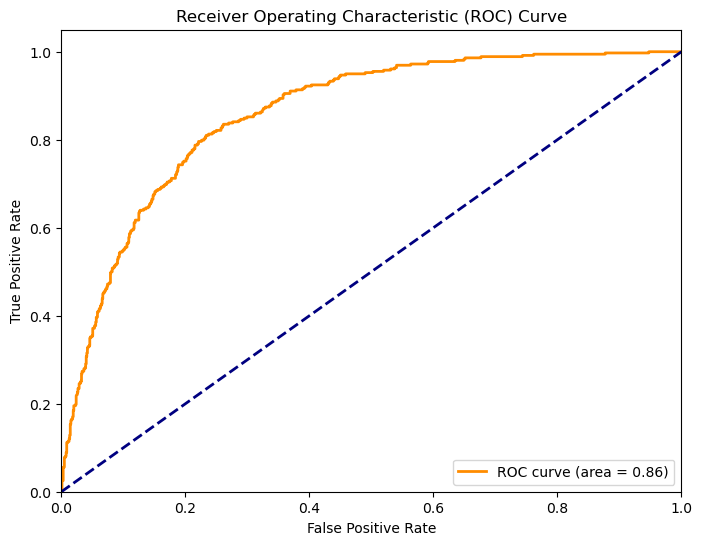

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
# ROC Curve
y_prob = logistic_model.predict_proba(X_test)[:, 1]  # Probability of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_1484\2783308668.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()


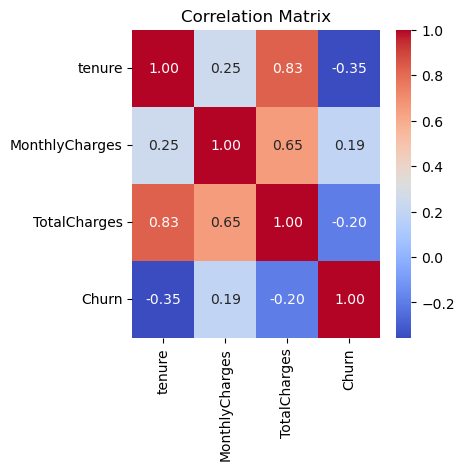

In [69]:
correlation_matrix=df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [70]:
#drop TotalCharges since it is highly correlated with tenure and run the model
df1=df.drop(columns=['TotalCharges'])

In [71]:
#Logistic regression

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix



# Define the dependent variable 'Churn' and independent variables
X = df1[['tenure', 'MonthlyCharges']]
y = df1['Churn']

# Perform one-hot encoding for categorical variables
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
X_encoded = pd.get_dummies(df1[categorical_cols], drop_first=True)

In [72]:
# Concatenate one-hot encoded and numeric features
X_final = pd.concat([X, X_encoded], axis=1)

In [73]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=90)



In [74]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
# Fit a logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [76]:
# Predictions
y_pred = logistic_model.predict(X_test)

In [77]:
# Confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[935 114]
 [152 206]]


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8109452736318408
Precision: 0.64375
Recall: 0.5754189944134078
F1 Score: 0.6076696165191741


In [79]:
# Coefficients and their significance using statsmodels
X_train_sm = sm.add_constant(X_train)
logit_model = sm.Logit(y_train.astype(float), X_train_sm)
result = logit_model.fit()


Optimization terminated successfully.
         Current function value: 0.421269
         Iterations 8


In [80]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5625
Model:                          Logit   Df Residuals:                     5602
Method:                           MLE   Df Model:                           22
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                  0.2760
Time:                        10:56:57   Log-Likelihood:                -2369.6
converged:                       True   LL-Null:                       -3273.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5895      0.051    -31.116      0.000      -1.690      -1.489
x1            -0.8241      0.065    -12.772      0.000      -0.951      -0.698
x2            -0.6326      1.070     -0.591      0.5

In [81]:
X_final.columns

Index(['tenure', 'MonthlyCharges', 'gender_Male', 'SeniorCitizen_Yes',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

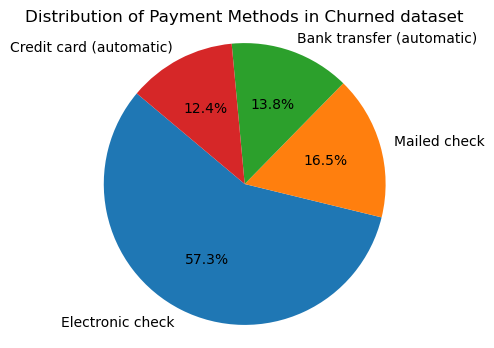

In [82]:
# Data
payment_methods = ["Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)"]
counts = [1071, 308, 258, 232]

# Create a pie chart
plt.figure(figsize=(4,4))
plt.pie(counts, labels=payment_methods, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Payment Methods in Churned dataset")

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

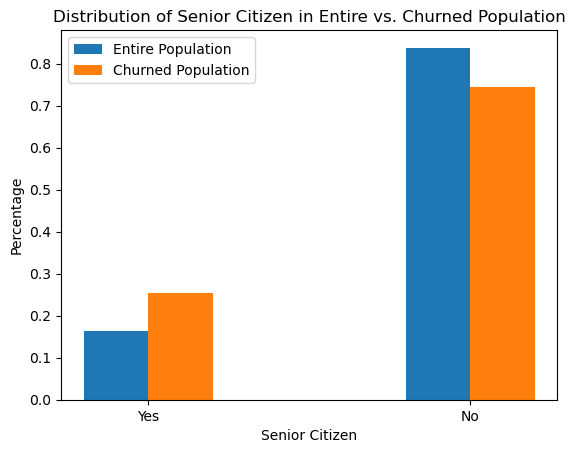

In [83]:
# Data
categories = ["Yes", "No"]
entire_population = [0.1624, 0.8376]
churned_population = [0.254682, 0.745318]

x = range(len(categories))

# Set the width of the bars
bar_width = 0.2

# Create bar plot for entire population
plt.bar(x, entire_population, width=bar_width, label='Entire Population')

# Create bar plot for churned population next to it
plt.bar([i + bar_width for i in x], churned_population, width=bar_width, label='Churned Population')

# Customize the plot
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')
plt.title('Distribution of Senior Citizen in Entire vs. Churned Population')
plt.xticks([i + bar_width / 2 for i in x], categories)
plt.legend()

# Show the plot
plt.show()



In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [85]:
df=pd.read_csv('Telco-Customer-Churn.csv')

In [86]:
df['gender'] = df['gender'].astype('category')
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})

In [87]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

In [88]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [89]:
# Drop rows with missing values
df.dropna(inplace=True)

In [90]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Define the dependent variable 'Churn' and independent variables
X = df[['tenure', 'MonthlyCharges']]

# Encode the categorical variables using LabelEncoder
label_encoder = LabelEncoder()
for col in ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']:
    X[col] = label_encoder.fit_transform(df[col])

y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)

# Create and train a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier using confusion matrix, accuracy, precision, recall, and F1-score
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate feature importances
feature_importances = clf.feature_importances_

# Print feature importances in descending order of importance
print("Feature Importances (Descending Order):")
importance_pairs = [(feature, importance) for feature, importance in zip(X.columns, feature_importances)]
importance_pairs.sort(key=lambda x: x[1], reverse=True)

for feature, importance in importance_pairs:
    print(f"{feature}: {importance}")



Confusion Matrix:
[[837 212]
 [175 183]]
Accuracy: 0.7249466950959488
Precision: 0.46329113924050636
Recall: 0.5111731843575419
F1-score: 0.4860557768924303
Feature Importances (Descending Order):
MonthlyCharges: 0.2746747278991999
tenure: 0.2132535119512108
Contract: 0.16659636869319328
OnlineSecurity: 0.04184227562168652
PaymentMethod: 0.0410138872439249
gender: 0.029142062742937326
PaperlessBilling: 0.028522214708647502
InternetService: 0.026355464611526297
SeniorCitizen: 0.024827518838909806
DeviceProtection: 0.024514290635793332
Partner: 0.023584466176977837
Dependents: 0.0216459584796582
MultipleLines: 0.02116238033446257
TechSupport: 0.02023853543261078
StreamingMovies: 0.015978316906593404
OnlineBackup: 0.013744507703888378
StreamingTV: 0.01177560370754762
PhoneService: 0.0011279083112315444


C:\Users\Admin\AppData\Local\Temp\ipykernel_1484\3469453327.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(df[col])
C:\Users\Admin\AppData\Local\Temp\ipykernel_1484\3469453327.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(df[col])
C:\Users\Admin\AppData\Local\Temp\ipykernel_1484\3469453327.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Best Hyperparameters:
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 30, 'min_samples_split': 10}
Classification Report with Best Classifier:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1049
           1       0.51      0.78      0.62       358

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.81      0.75      0.77      1407

Feature Importances (Descending Order):
Contract: 0.49201515756490893
MonthlyCharges: 0.15039099089827934
tenure: 0.14570888822830047
TechSupport: 0.06933463006430902
InternetService: 0.047362195233449554
OnlineSecurity: 0.0164437505714629
PaymentMethod: 0.01486170693036825
PaperlessBilling: 0.012065492244957973
StreamingMovies: 0.011948208948766494
PhoneService: 0.010863326939078958
gender: 0.009995044310017786
DeviceProtection: 0.005861707393880245
MultipleLines: 0.0053474000194527

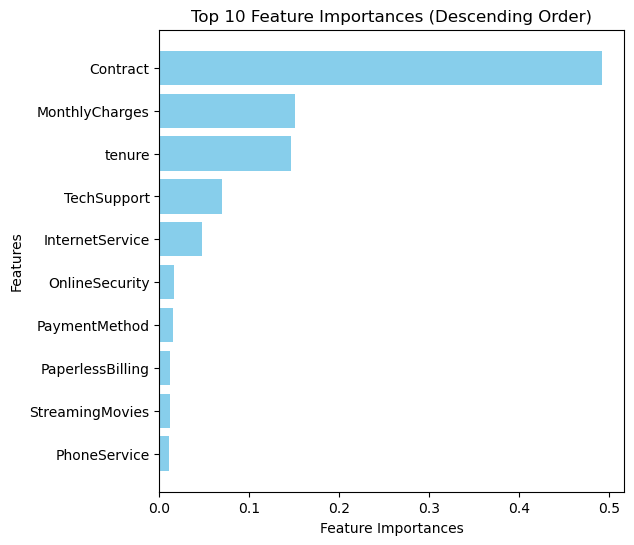

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Define a grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 10, 20, 30, 40, 50],
    'min_samples_split': [ 10,20,30],
    'min_samples_leaf': [10, 20, 30],
    'class_weight': [None, 'balanced'],
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Get the best classifier from the grid search
best_classifier = grid_search.best_estimator_

# Make predictions on the test set using the best classifier
y_pred = best_classifier.predict(X_test)

# Evaluate the best classifier
print("Classification Report with Best Classifier:")
print(classification_report(y_test, y_pred))

# Obtain feature importances
feature_importances = best_classifier.feature_importances_

# Print feature importances in descending order of importance
print("Feature Importances (Descending Order):")
importance_pairs = [(feature, importance) for feature, importance in zip(X.columns, feature_importances)]
importance_pairs.sort(key=lambda x: x[1], reverse=True)

for feature, importance in importance_pairs:
    print(f"{feature}: {importance}")

from sklearn.metrics import confusion_matrix

# Make predictions on the test set using the best classifier
y_pred = best_classifier.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Select the top 10 features and their importances
top_feature_names = [pair[0] for pair in importance_pairs[:10]]
top_importances = [pair[1] for pair in importance_pairs[:10]]

# Create a bar plot for the top 10 feature importances
plt.figure(figsize=(6, 6))
plt.barh(top_feature_names, top_importances, color='skyblue')
plt.xlabel('Feature Importances')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances (Descending Order)')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.show()


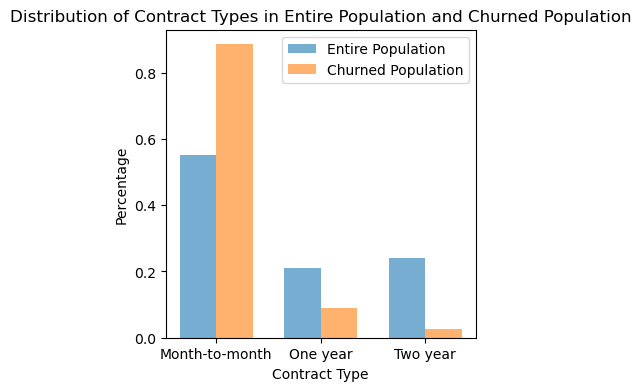

In [93]:
import matplotlib.pyplot as plt

# Data
contracts = ['Month-to-month', 'One year', 'Two year']
entire_population = [0.551052, 0.209329, 0.239619]
churned_population = [0.8855, 0.088818, 0.025682]

# Create subplots
fig, ax = plt.subplots(figsize=(4,4))

# Bar width
bar_width = 0.35

# Bar positions
x = range(len(contracts))

# Create bars
plt.bar(x, entire_population, width=bar_width, label='Entire Population', alpha=0.6)
plt.bar([i + bar_width for i in x], churned_population, width=bar_width, label='Churned Population', alpha=0.6)

# X-axis labels
plt.xlabel('Contract Type')
plt.xticks([i + bar_width/2 for i in x], contracts)

# Y-axis label
plt.ylabel('Percentage')

# Title
plt.title('Distribution of Contract Types in Entire Population and Churned Population')

# Legend
plt.legend()

# Show the plot
plt.show()



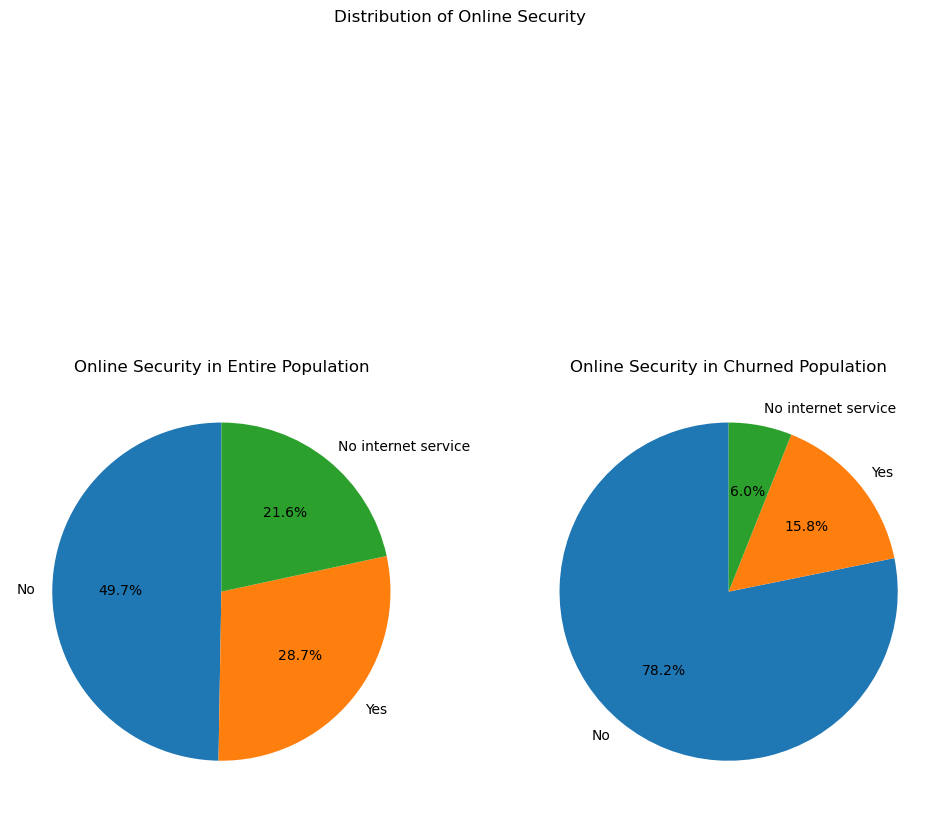

In [94]:
# Data
categories = ['No', 'Yes', 'No internet service']
entire_population = [0.4972, 0.2865, 0.2161]
churned_population = [0.7817, 0.1578, 0.0604]

fontsize = 30

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,12))

# Subplot 1: Entire Population
ax1.pie(entire_population, labels=categories, autopct='%1.1f%%', startangle=90)
ax1.set_title('Online Security in Entire Population')

# Subplot 2: Churned Population
ax2.pie(churned_population, labels=categories, autopct='%1.1f%%', startangle=90)
ax2.set_title('Online Security in Churned Population')

# Add a title for the entire figure
plt.suptitle('Distribution of Online Security')

# Display the pie chart
plt.show()



In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Create and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=90)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier using confusion matrix, accuracy, precision, recall, and F1-score
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate feature importances
feature_importances = rf_classifier.feature_importances_

# Print feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")



Confusion Matrix:
[[944 105]
 [189 169]]
Accuracy: 0.7910447761194029
Precision: 0.6167883211678832
Recall: 0.4720670391061452
F1-score: 0.5348101265822783
Feature Importances:
tenure: 0.22949575577271952
MonthlyCharges: 0.23702871040549775
gender: 0.03375258242616741
SeniorCitizen: 0.024230540143545927
Partner: 0.026775632197759146
Dependents: 0.02331994566333079
PhoneService: 0.005963902627638338
MultipleLines: 0.0274598229947639
InternetService: 0.027474805859728908
OnlineSecurity: 0.03987812036586327
OnlineBackup: 0.02933735561562701
DeviceProtection: 0.02537587183693552
TechSupport: 0.04409987517817636
StreamingTV: 0.020410047849493844
StreamingMovies: 0.021077475574082787
Contract: 0.09175905899012084
PaperlessBilling: 0.029687191279274588
PaymentMethod: 0.06287330521927403


Best Hyperparameters:
{'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 30, 'min_samples_split': 10, 'n_estimators': 100}
Classification Report with Best Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1049
           1       0.53      0.81      0.64       358

    accuracy                           0.77      1407
   macro avg       0.72      0.78      0.73      1407
weighted avg       0.82      0.77      0.78      1407

Feature Importances (Descending Order):
Contract: 0.31380707136739766
tenure: 0.18697858421691566
TechSupport: 0.10670639333090472
OnlineSecurity: 0.09315666116035291
MonthlyCharges: 0.08817457291837659
InternetService: 0.062262094224900505
OnlineBackup: 0.032441250931966245
PaymentMethod: 0.027656384642344933
DeviceProtection: 0.020796160907384682
PaperlessBilling: 0.014623040553839147
StreamingMovies: 0.010806660752294217
StreamingTV: 0.009228392990019596
MultipleLines: 

<Figure size 600x600 with 0 Axes>

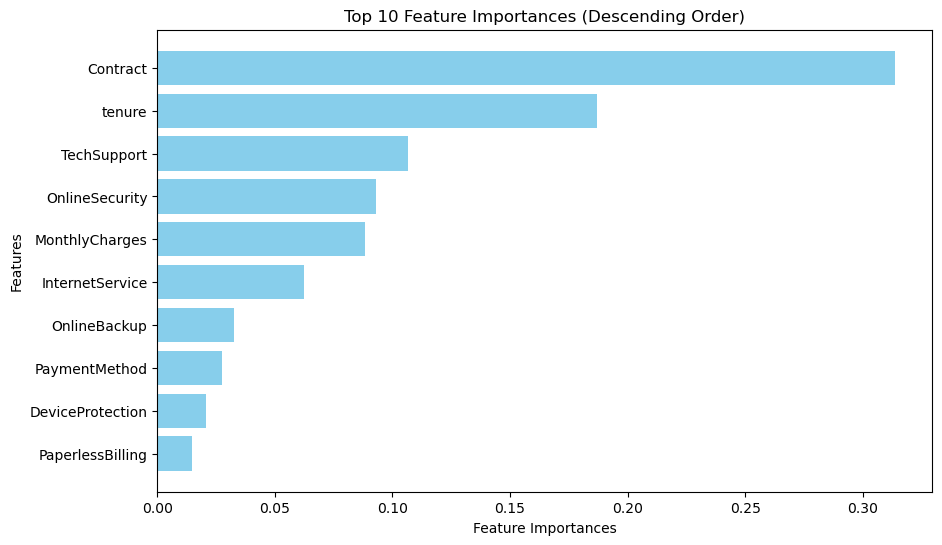

Confusion Matrix:
[[788 261]
 [ 67 291]]


In [96]:
# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],  # You can adjust the number of trees
    'max_depth': [ 10, 20, 30],
    'min_samples_split': [ 10,20,30],
    'min_samples_leaf': [10,20,30],
    'class_weight': [None, 'balanced'],
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Get the best classifier from the grid search
best_rf_classifier = grid_search.best_estimator_

# Make predictions on the test set using the best classifier
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the best classifier
print("Classification Report with Best Random Forest Classifier:")
print(classification_report(y_test, y_pred))


# Obtain feature importances
feature_importances = best_rf_classifier.feature_importances_

# Print feature importances in descending order of importance
print("Feature Importances (Descending Order):")
importance_pairs = [(feature, importance) for feature, importance in zip(X.columns, feature_importances)]
importance_pairs.sort(key=lambda x: x[1], reverse=True)

for feature, importance in importance_pairs:
    print(f"{feature}: {importance}")

# Select the top 10 features and their importances
plt.figure(figsize=(6, 6))
top_feature_names = [pair[0] for pair in importance_pairs[:10]]
top_importances = [pair[1] for pair in importance_pairs[:10]]

# Create a bar plot for the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_feature_names, top_importances, color='skyblue')
plt.xlabel('Feature Importances')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances (Descending Order)')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.show()
    
from sklearn.metrics import confusion_matrix

# Make predictions on the test set using the best Random Forest classifier
y_pred = best_rf_classifier.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

In [100]:
df['tenure'].dtype

dtype('int64')

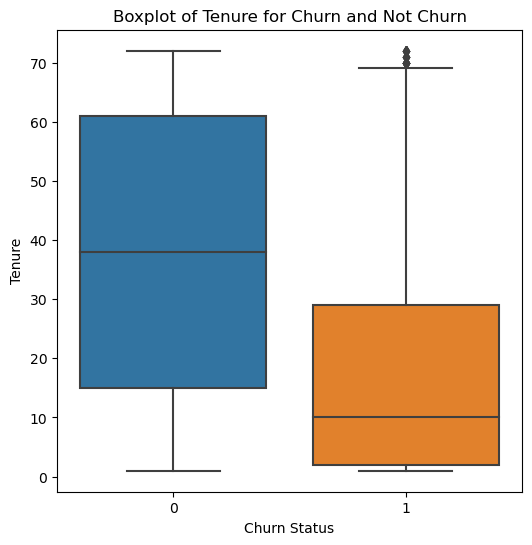

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame called 'df' with 'Tenure' and 'Churn' columns
# Filter the data based on Churn status
churned_data = df[df['Churn'] == 1]
not_churned_data = df[df['Churn'] == 0]

# Create a boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Boxplot of Tenure for Churn and Not Churn')
plt.ylabel('Tenure')
plt.xlabel('Churn Status')
plt.show()



